In [91]:
library(data.table) # used for reading and manipulation of data
library(dplyr)      # used for data manipulation and joining
library(ggplot2)    # used for plotting 
library(corrplot)   # used for making correlation plot
library(cowplot)    # used for combining multiple plots    
library(rpart)      # used for decision tree regression
library(MLmetrics)  # used for measuring performance of models
library(randomForest)  # used for random forest regression
library(caTools) # used for splitting data
library(stringr) # used for String manipulation
library(tidyr) # used for data cleaning
library(tm) # used for text mining
library(SnowballC) # used for converting words to root word
library(wordcloud) # used for creating wordcloud
library(caret) #used for model training

In [92]:
train = read.csv("train.csv",stringsAsFactors = T) #importing the data.

<center><h2>Understanding the Data</h2></center>

In [93]:
head(train)

index,beer.ABV,beer.beerId,beer.brewerId,beer.name,beer.style,review.appearance,review.aroma,review.overall,review.palate,review.taste,review.text,review.timeStruct,review.timeUnix,user.ageInSeconds,user.birthdayRaw,user.birthdayUnix,user.gender,user.profileName
40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed.","{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, 'year': 2008, 'wday': 1, 'mon': 12, 'isdst': 0, 'yday': 351}",1229398690,NA,,NA,,RblWthACoz
8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,"12oz bottle into 8oz snifter. Deep ruby red hue with a one finger light tan head that settles to a thin rim along the glass. Sharp piercing hops with some light hard candy in the background. The hops provide some bitterness, but they aren't as sharp as I would have expected. Mostly a light candy flavor like in the aroma. Full bodied with good carbonation. The finish is some lingering sweet flavor with a bit of bitterness. A very sweet barleywine with a weird hard candy flavor that seemed to dominate. Not bad, but I would have liked a little more complexity.","{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, 'year': 2008, 'wday': 4, 'mon': 8, 'isdst': 0, 'yday': 221}",1218238738,NA,,NA,,BeerSox
10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,"First enjoyed at the brewpub about 2 years ago, I finally managed to get a bottle. Slightly hazy orange-amber topped with a two finger foamy white head. Very nice fruity aroma, soft and floral, tea and toast. Fruity, slightly grapefruity hop note, toast and biscuity malt balance. Hoppier and more floral when it warms up. Light-medium bodied, liked it better on draft but still a solid beer.","{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, 'year': 2004, 'wday': 4, 'mon': 11, 'isdst': 0, 'yday': 331}",1101492422,NA,,NA,Male,mschofield
44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,"First thing I noticed after pouring from green bottle to glass was the skunky smell. Overpowering. Lacing was minimal and faded quickly. Bottle had exp date and was still within freshness date. Taste was like drinking a milwaukee's best with some skunk. Just couldn't get over the skunky smell to finish my second bottle. Almost $10 a sixer, I would have been better off getting Bud Light.","{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'year': 2011, 'wday': 0, 'mon': 6, 'isdst': 0, 'yday': 171}",1308532025,1209827047,"Aug 10, 1976",208508400,Male,molegar76
37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,"A: pours an amber with a one finger head but only with a very strong pour, head recedes to a light layer of foam with some large bubbles and good lacing S: sweet caramel and bread from the English malts comes through, some mild fruityness on the back end T: not a lot of complexity with this for me. I didn't expect much considering the style but it's just bland and lacking more bready layers M/D: more carbonated than I would have wanted. I would expect this to be much better on cask","{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, 'year': 2011, 'wday': 5, 'mon': 3, 'isdst': 0, 'yday': 71}",1299912708,NA,,NA,,Brewbro000
14095,10.0,21436,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,"served in a snifter; on-tap at CBC. color is the typical imperial stout used motor oil black; impenetrable. by the time the beer arrived at our table the had had receded into a collar

In [94]:
dim(train)

[1] 37500    19

In [95]:
str(train)

'data.frame':	37500 obs. of  19 variables:
 $ index            : int  40163 8135 10529 44610 37062 14095 13759 3914 47953 7047 ...
 $ beer.ABV         : num  5 11 4.7 4.4 4.4 10 12.6 8.4 9 6.2 ...
 $ beer.beerId      : int  46634 3003 961 429 4904 21436 10001 52211 34361 32676 ...
 $ beer.brewerId    : int  14338 395 365 1 1417 14 14 14879 394 1386 ...
 $ beer.name        : Factor w/ 1688 levels "'Pooya Porter",..: 372 153 1052 1179 231 1677 167 675 1410 1122 ...
 $ beer.style       : Factor w/ 95 levels "Altbier","American Adjunct Lager",..: 62 5 15 36 47 82 21 79 42 13 ...
 $ review.appearance: num  4 4 3.5 3 4 4 4 4 4.5 2 ...
 $ review.aroma     : num  4 3.5 4 3 3 4 4.5 4 4 2 ...
 $ review.overall   : num  4 3.5 3.5 2.5 3 4 4 4 4.5 2 ...
 $ review.palate    : num  4 3.5 3.5 3 3.5 4 4 4 4.5 2.5 ...
 $ review.taste     : num  4 3 3.5 3 2.5 4.5 4 4 4.5 2 ...
 $ review.text      : Factor w/ 37483 levels "","'04-'05 vintage on-tap at the brewpub. This vintage was listed as 12%. \tDeep ru

<h2><center> Data Exploratory Analysis </center></h2>

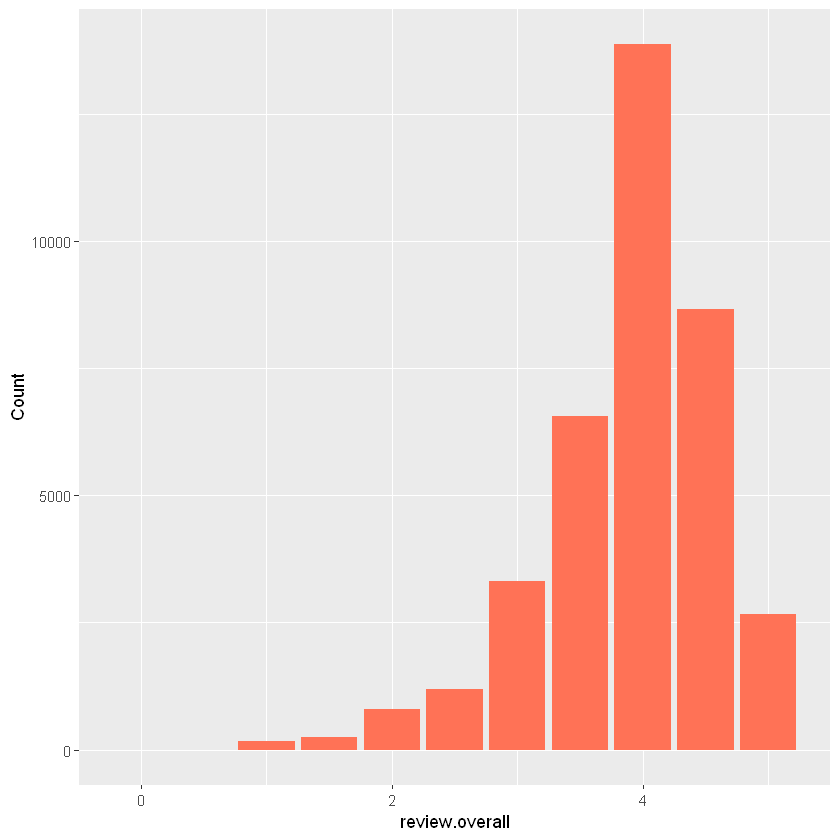

In [96]:
ggplot(train %>% group_by(review.overall) %>% summarise(Count = n())) +
geom_bar(aes(review.overall, Count), stat = "identity", fill = "coral1")

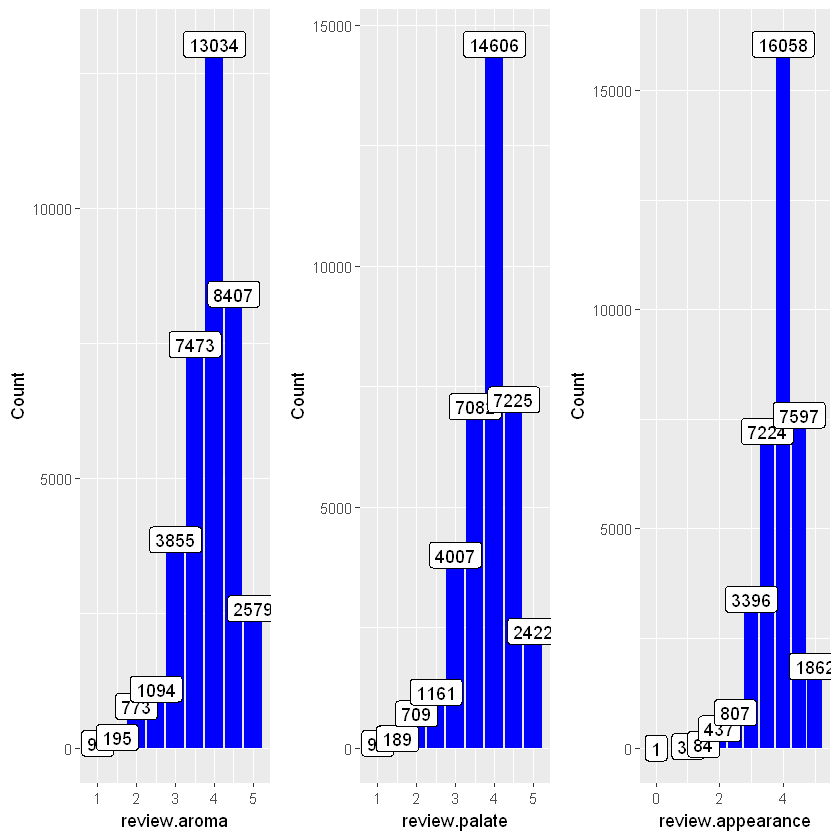

In [97]:
p1 = ggplot(train %>% group_by(review.aroma) %>% summarise(Count = n())) +
geom_bar(aes(review.aroma, Count), stat = "identity", fill = "blue")+
geom_label(aes(review.aroma, Count, label = Count), vjust = 0.5)

p2 = ggplot(train %>% group_by(review.palate) %>% summarise(Count = n())) +
geom_bar(aes(review.palate, Count), stat = "identity", fill = "blue")+
geom_label(aes(review.palate, Count, label = Count), vjust = 0.5)

p3 = ggplot(train %>% group_by(review.appearance) %>% summarise(Count = n())) +
geom_bar(aes(review.appearance, Count), stat = "identity", fill = "blue")+
geom_label(aes(review.appearance, Count, label = Count), vjust = 0.5)

plot_grid(p1,p2,p3,nrow = 1)

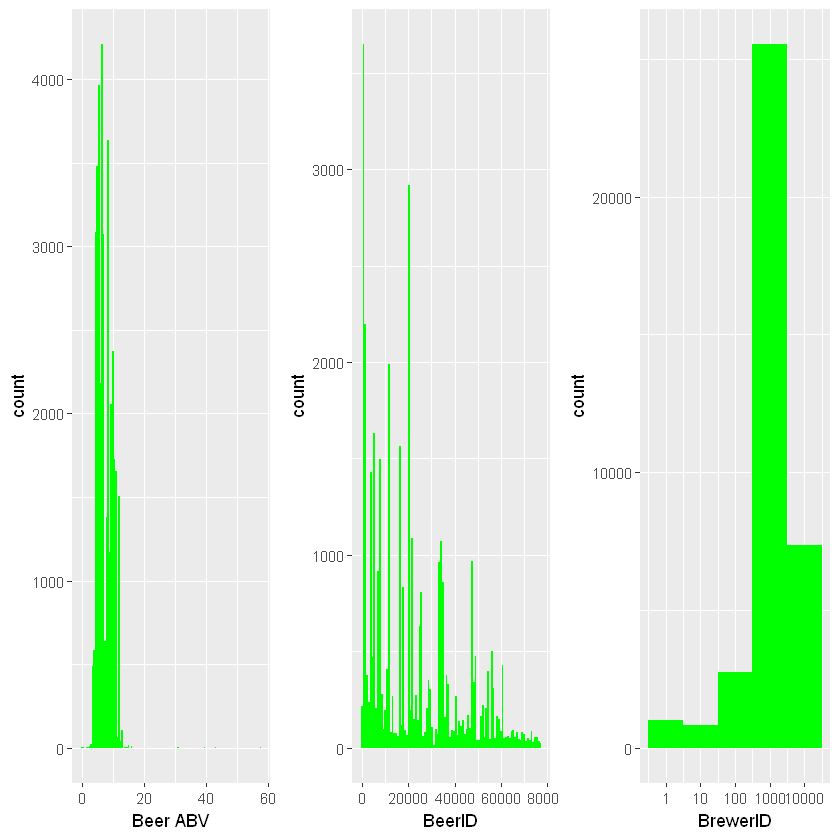

In [98]:
p4 = ggplot(train,aes(train$beer.ABV))+geom_histogram(binwidth = 0.5,fill = "Green")+xlab("Beer ABV")
p5 = ggplot(train) + geom_histogram(aes(beer.beerId), bins = 100,fill = "Green")+xlab("BeerID")
p6 = ggplot(train,aes(train$beer.brewerId))+geom_histogram(binwidth = 1,fill = "Green")+xlab("BrewerID")+scale_x_log10()


plot_grid(p4,p5,p6,nrow = 1)

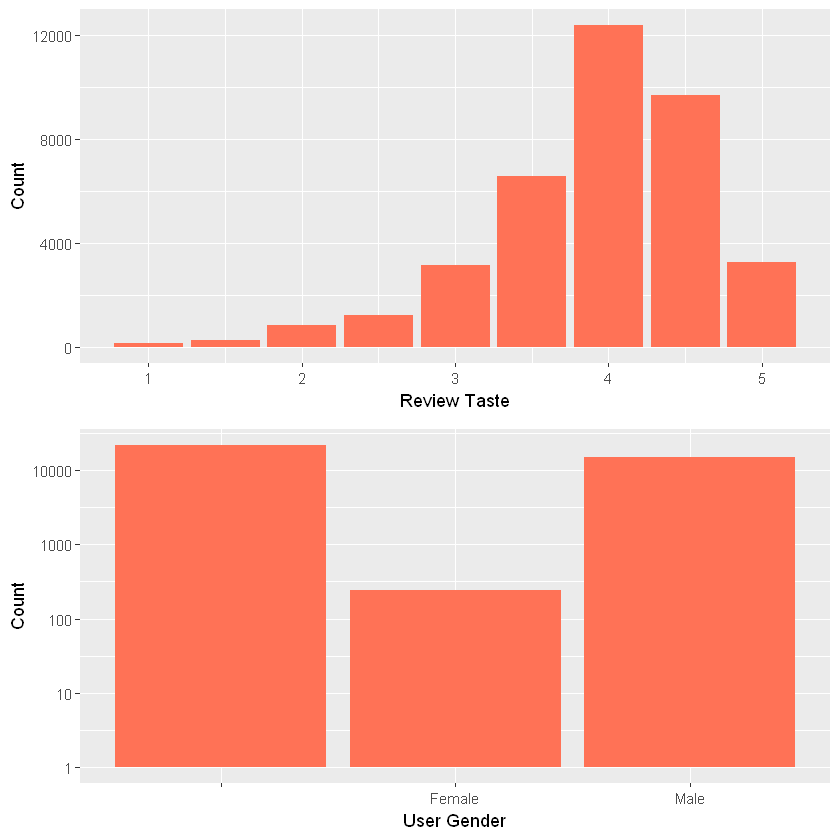

In [99]:
p7 = ggplot(train %>% group_by(review.taste) %>% summarise(Count = n()),aes(review.taste, Count)) +
geom_bar( stat = "identity", fill = "coral1") +
xlab("Review Taste") 

p8 = ggplot(train %>% group_by(user.gender) %>% summarise(Count = n()),aes(user.gender, Count)) +
geom_bar( stat = "identity", fill = "coral1") +
xlab("User Gender")+scale_y_log10()

second_row = plot_grid(p8, nrow = 1)
plot_grid(p7, second_row, ncol = 1)

<center><h2>Data Preprocessing</h2></center>

In [100]:
summary(is.na(train))

   index          beer.ABV       beer.beerId     beer.brewerId  
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:37500     FALSE:37500     FALSE:37500     FALSE:37500    
                                                                
 beer.name       beer.style      review.appearance review.aroma   
 Mode :logical   Mode :logical   Mode :logical     Mode :logical  
 FALSE:37500     FALSE:37500     FALSE:37500       FALSE:37500    
                                                                  
 review.overall  review.palate   review.taste    review.text    
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:37500     FALSE:37500     FALSE:37500     FALSE:37500    
                                                                
 review.timeStruct review.timeUnix user.ageInSeconds user.birthdayRaw
 Mode :logical     Mode :logical   Mode :logical     Mode :logical   
 FALSE:37500       FALSE:37500     FALSE:7856        FALSE:37500     
  

<h1>Observations</h1>
<ul>
<li><h3>user.birthdayRaw, user.birthdayUnix, user.gender, and ageinseconds have more than 80% data is missing</h3>
<li><h3> index, beer.beerId, beer.brewerId, review.timeUnix and user.profileName have nothing to do with review</h3> 
</ul>    

In [101]:
train = train[,c(2,5,6,7,8,9,10,11,12,13)]

In [102]:
head(train)

beer.ABV,beer.name,beer.style,review.appearance,review.aroma,review.overall,review.palate,review.taste,review.text,review.timeStruct
5.0,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed.","{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, 'year': 2008, 'wday': 1, 'mon': 12, 'isdst': 0, 'yday': 351}"
11.0,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,"12oz bottle into 8oz snifter. Deep ruby red hue with a one finger light tan head that settles to a thin rim along the glass. Sharp piercing hops with some light hard candy in the background. The hops provide some bitterness, but they aren't as sharp as I would have expected. Mostly a light candy flavor like in the aroma. Full bodied with good carbonation. The finish is some lingering sweet flavor with a bit of bitterness. A very sweet barleywine with a weird hard candy flavor that seemed to dominate. Not bad, but I would have liked a little more complexity.","{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, 'year': 2008, 'wday': 4, 'mon': 8, 'isdst': 0, 'yday': 221}"
4.7,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,"First enjoyed at the brewpub about 2 years ago, I finally managed to get a bottle. Slightly hazy orange-amber topped with a two finger foamy white head. Very nice fruity aroma, soft and floral, tea and toast. Fruity, slightly grapefruity hop note, toast and biscuity malt balance. Hoppier and more floral when it warms up. Light-medium bodied, liked it better on draft but still a solid beer.","{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, 'year': 2004, 'wday': 4, 'mon': 11, 'isdst': 0, 'yday': 331}"
4.4,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,"First thing I noticed after pouring from green bottle to glass was the skunky smell. Overpowering. Lacing was minimal and faded quickly. Bottle had exp date and was still within freshness date. Taste was like drinking a milwaukee's best with some skunk. Just couldn't get over the skunky smell to finish my second bottle. Almost $10 a sixer, I would have been better off getting Bud Light.","{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'year': 2011, 'wday': 0, 'mon': 6, 'isdst': 0, 'yday': 171}"
4.4,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,"A: pours an amber with a one finger head but only with a very strong pour, head recedes to a light layer of foam with some large bubbles and good lacing S: sweet caramel and bread from the English malts comes through, some mild fruityness on the back end T: not a lot of complexity with this for me. I didn't expect much considering the style but it's just bland and lacking more bready layers M/D: more carbonated than I would have wanted. I would expect this to be much better on cask","{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, 'year': 2011, 'wday': 5, 'mon': 3, 'isdst': 0, 'yday': 71}"
10.0,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,"served in a snifter; on-tap at CBC. color is the typical imperial stout used motor oil black; impenetrable. by the time the beer arrived at our table the had had receded into a collar around the glass. noses offers ample amounts of roastiness, chocolate, molasses and dark fruits, also an atypical tartness to it. not picking up much in the way of bourbon. flavor imparts more of the same: big notes of roasted malt with chocolate and molasses not far behind, also some dark fruit characters to it and a very distinct and unusual tartness, which adds almost a distinctive flair. more b

<h3> Convrting 'beer.name' column and 'beer.style' column into factors.</h3>

In [103]:
style = train$beer.style

In [104]:
train$beer.style = as.integer(train$beer.style)

In [105]:
train$beer.style = as.factor(train$beer.style)

In [106]:
summary(train$beer.style)

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 123  170  489   23  634  104  272  244   11 2872   10 4495 3050   64 1711   95 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 116 1687  457  129   75  404  130   96  105  107  444    6    4   97  103   23 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   7    8   52 1131  669   22  121   42    5   90  196  359   16  123  971   18 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 268  103  126  105  522  254  506    8    2   44 1021  450  477   62   71   65 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
  77   19    6    6    7  372    7  410  172   53   96  489   72  783  420   84 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95 
1462 2032 1355   97   40 2133   52   46   45  202   29    9  343  202  116

In [107]:
name = train$beer.name
train$beer.name = as.integer(train$beer.name)
train$beer.name = as.factor(train$beer.name)
summary(train$beer.name)

575     621     579     642     593    1179     596     618     592     552 
   1883    1441    1064    1051     983     947     857     805     800     778 
    639      38     115     589    1415     609     578     637      39    1027 
    675     665     636     574     538     492     482     457     433     429 
   1099     580     630      78     629     133    1427     331     568    1422 
    381     372     348     345     322     298     296     278     275     272 
   1352    1416    1430      40     231     864    1001     566      36     640 
    268     265     263     252     252     251     248     229     220     214 
   1614    1172     430    1419      20    1261    1354      34    1214     820 
    209     206     182     179     178     178     175     167     157     155 
   1101    1167    1168      69     675     441    1146    1412     367     335 
    155     154     146     143     139     138     135     135     133     126 
   1079     564    1074    1624     773    1335    1483    1438     252     463 
    117     115     115     111     110     108     103      98      97      96 
    274     166     926    1418     676     807    1203     782      59     118 
     94      92      91      86      84      84      83      82      81      81 
    136     415     553    1052     145     716    1428     109    1097    1023 
     81      78      78      78      77      76      75      74      72      71 
   1111    1169    1616    1435    1612    1425    1150      35    1094 (Other) 
     71      71      70      68      66      65      64      62      62    9384

<h3>Extracting month value from 'review.timeStruct' column.</h3>

In [108]:
month = c()
for(i in 1:length(train$review.timeStruct)){
m=train$review.timeStruct[i]
m = (str_extract_all(m, "(?<=\\{).+?(?=\\})")[[1]])
m = str_split_fixed(m,",",9)
as.list(m)
m[7]
month = rbind(month,as.integer(str_split_fixed(m[7],":",2)[[2]]))
    }
month = as.factor(month)
length(month)

[1] 37500

In [109]:
train = cbind(train,month)

In [110]:
train = train[,-c(10)] #removing review.timeStruct column

In [111]:
str(train)

'data.frame':	37500 obs. of  10 variables:
 $ beer.ABV         : num  5 11 4.7 4.4 4.4 10 12.6 8.4 9 6.2 ...
 $ beer.name        : Factor w/ 1688 levels "1","2","3","4",..: 372 153 1052 1179 231 1677 167 675 1410 1122 ...
 $ beer.style       : Factor w/ 95 levels "1","2","3","4",..: 62 5 15 36 47 82 21 79 42 13 ...
 $ review.appearance: num  4 4 3.5 3 4 4 4 4 4.5 2 ...
 $ review.aroma     : num  4 3.5 4 3 3 4 4.5 4 4 2 ...
 $ review.overall   : num  4 3.5 3.5 2.5 3 4 4 4 4.5 2 ...
 $ review.palate    : num  4 3.5 3.5 3 3.5 4 4 4 4.5 2.5 ...
 $ review.taste     : num  4 3 3.5 3 2.5 4.5 4 4 4.5 2 ...
 $ review.text      : Factor w/ 37483 levels "","'04-'05 vintage on-tap at the brewpub. This vintage was listed as 12%. \tDeep ruby brown body with a faint haze"| __truncated__,..: 27056 1575 14547 14661 8267 31599 20329 22411 6804 12533 ...
 $ month            : Factor w/ 12 levels "1","2","3","4",..: 12 8 11 6 3 12 6 10 7 10 ...


<h3>Converting 'review.text' column into 'reviewByText' column with the help of 'review.overall' by NLP(Natural Language Processing). So that, We can use this column into prediction model.</h3><br>

In [112]:
data = train[,c(6,9)]

In [113]:
head(data)

review.overall,review.text
4.0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed."
3.5,"12oz bottle into 8oz snifter. Deep ruby red hue with a one finger light tan head that settles to a thin rim along the glass. Sharp piercing hops with some light hard candy in the background. The hops provide some bitterness, but they aren't as sharp as I would have expected. Mostly a light candy flavor like in the aroma. Full bodied with good carbonation. The finish is some lingering sweet flavor with a bit of bitterness. A very sweet barleywine with a weird hard candy flavor that seemed to dominate. Not bad, but I would have liked a little more complexity."
3.5,"First enjoyed at the brewpub about 2 years ago, I finally managed to get a bottle. Slightly hazy orange-amber topped with a two finger foamy white head. Very nice fruity aroma, soft and floral, tea and toast. Fruity, slightly grapefruity hop note, toast and biscuity malt balance. Hoppier and more floral when it warms up. Light-medium bodied, liked it better on draft but still a solid beer."
2.5,"First thing I noticed after pouring from green bottle to glass was the skunky smell. Overpowering. Lacing was minimal and faded quickly. Bottle had exp date and was still within freshness date. Taste was like drinking a milwaukee's best with some skunk. Just couldn't get over the skunky smell to finish my second bottle. Almost $10 a sixer, I would have been better off getting Bud Light."
3.0,"A: pours an amber with a one finger head but only with a very strong pour, head recedes to a light layer of foam with some large bubbles and good lacing S: sweet caramel and bread from the English malts comes through, some mild fruityness on the back end T: not a lot of complexity with this for me. I didn't expect much considering the style but it's just bland and lacking more bready layers M/D: more carbonated than I would have wanted. I would expect this to be much better on cask"
4.0,"served in a snifter; on-tap at CBC. color is the typical imperial stout used motor oil black; impenetrable. by the time the beer arrived at our table the had had receded into a collar around the glass. noses offers ample amounts of roastiness, chocolate, molasses and dark fruits, also an atypical tartness to it. not picking up much in the way of bourbon. flavor imparts more of the same: big notes of roasted malt with chocolate and molasses not far behind, also some dark fruit characters to it and a very distinct and unusual tartness, which adds almost a distinctive flair. more bourbon than i picked up in the aroma but still a subtle presence on that front. medium-full on the palate with average carbonation. overall a tasty and interesting beer. i like the unique element that the tartness bring; could use a bigger bourbon presence though. also priced very reasonably at $5.50 a glass."


In [114]:
corpous = VCorpus(VectorSource(data$review.text))
corpous = tm_map(corpous,content_transformer(tolower)) # converting all text to lower alphabets
corpous = tm_map(corpous,removeNumbers)# removing all numeric data 
corpous = tm_map(corpous,removePunctuation)# removing all punctuation marks
corpous = tm_map(corpous,removeWords,stopwords()) # removing extra words like pronouns, articles etc.
corpous = tm_map(corpous,stemDocument)# converting all words to there root words
corpous = tm_map(corpous,stripWhitespace) # removing white spaces

In [115]:
dtm = DocumentTermMatrix(corpous)# creating sparse matrix
dtm = removeSparseTerms(dtm,0.98)
dtm

<<DocumentTermMatrix (documents: 37500, terms: 525)>>
Non-/sparse entries: 1656332/18031168
Sparsity           : 92%
Maximal term length: 12
Weighting          : term frequency (tf)

<h2> Creating WordCloud for finding most used words. </h2> 

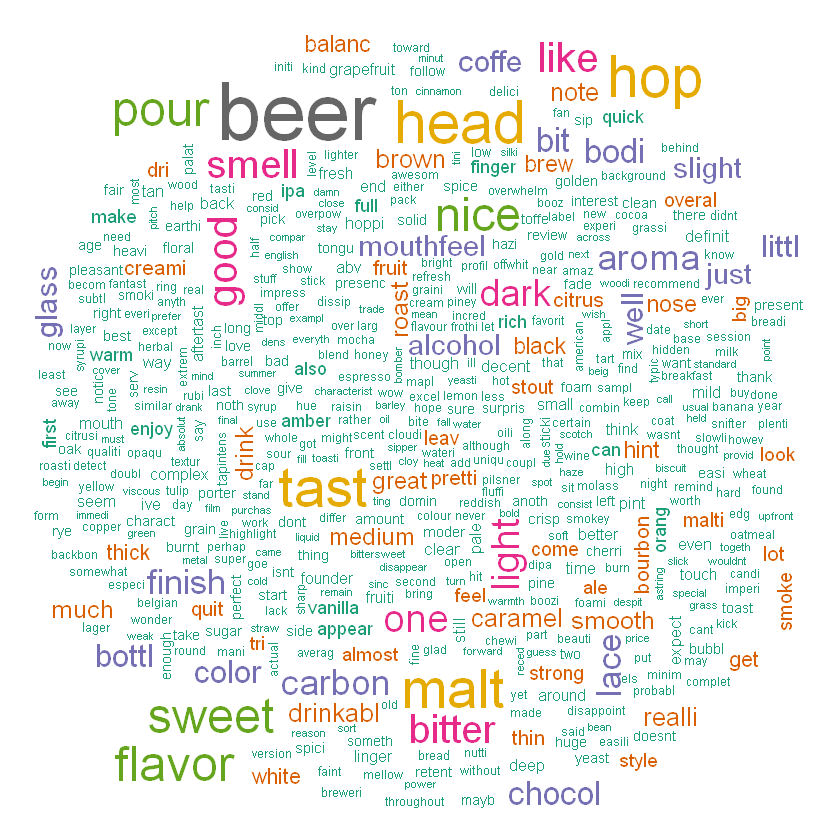

In [116]:
dtmm = TermDocumentMatrix(corpous)
dtmm = removeSparseTerms(dtmm,0.98)
m = as.matrix(dtmm)
v = sort(rowSums(m),decreasing = TRUE)
d = data.frame(word = names(v),freq = v)
wordcloud(words = d$word,freq = d$freq,colors = brewer.pal(8,"Dark2"))

In [117]:
dim(dtm)

[1] 37500   525

In [118]:
dataset = as.data.frame(as.matrix(dtm))#converting again as data frame
dataset$review.overall = data$review.overall

In [119]:
dim(dataset)

[1] 37500   526

In [120]:
set.seed(999)
split = sample.split(dataset$review.overall, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [121]:
regressor1 = randomForest(training_set[,],training_set$review.overall,ntree = 10)

In [122]:
reviewByText = predict(regressor1, dataset[])
head(reviewByText)

1    2    3    4    5    6 
4.00 3.50 3.55 2.50 3.00 4.00

In [123]:
train = cbind(train,reviewByText)
train = train[,-c(9)] #removing review.text column 

<h3> Checking Correlation between Independent numerical variables.</h3>

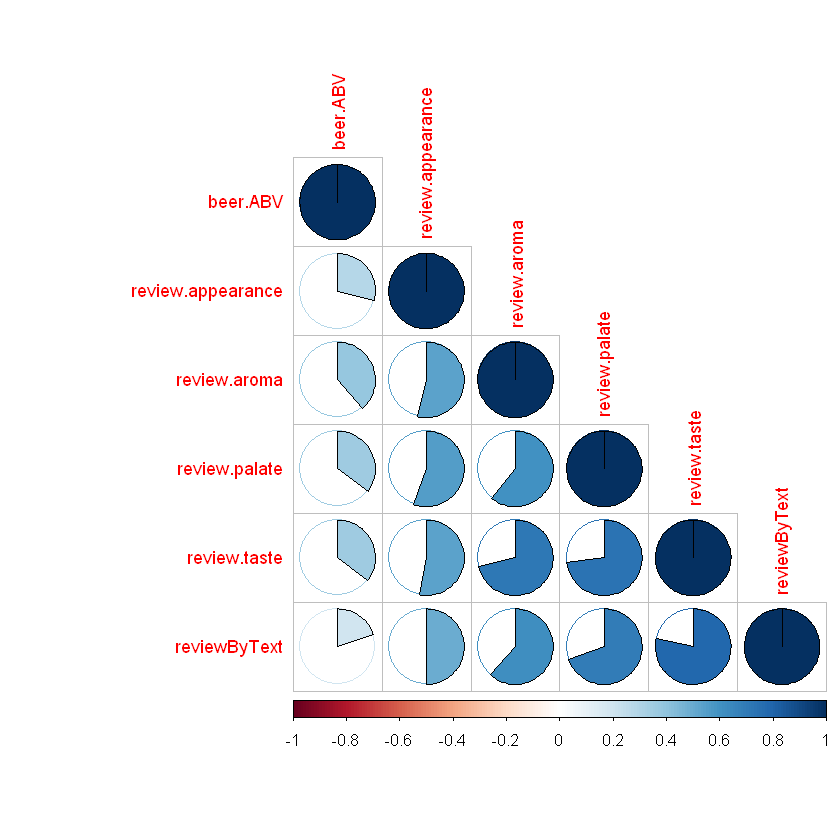

In [124]:
cor_train = cor(train[,-c(2,3,6,9)]) 
corrplot(cor_train, method = "pie", type = "lower", tl.cex = 0.9)

<center><h2>Data Splitting </h2></center>

In [125]:
set.seed(999)
split = sample.split(train$review.overall, SplitRatio = 0.8)
training_set = subset(train, split == TRUE)
test_set = subset(train, split == FALSE)

<h2><center>Desicion Tree</center></h2>

In [126]:
regressor = rpart(formula = review.overall ~ .,
                  data = training_set[],
                  control = rpart.control(minsplit = 4))

y_pred = predict(regressor, test_set[])

In [127]:
R2_Score(y_pred,test_set$review.overall) # prediction on Test dataset

[1] 0.9899042

In [128]:
MAE(y_pred,test_set$review.overall)
MSE(y_pred,test_set$review.overall)
RMSE(y_pred,test_set$review.overall)

[1] 0.0170101

[1] 0.004948789

[1] 0.07034763

In [129]:
y_pred1 = predict(regressor,training_set) # Prediction on train dataset.
R2_Score(y_pred1,training_set$review.overall)

[1] 0.9917997

<center><h2>Random Forest</h2></center>

In [130]:
regressor1 = randomForest(training_set[,-c(2,3)],training_set$review.overall,ntree = 100)

In [131]:
y_pred3 = predict(regressor1, test_set[]) # Prediction on test dataset.

In [132]:
R2_Score(y_pred3,test_set$review.overall)

[1] 0.9993155

In [133]:
MAE(y_pred3,test_set$review.overall)
MSE(y_pred3,test_set$review.overall)
RMSE(y_pred3,test_set$review.overall)

[1] 0.004550402

[1] 0.000335529

[1] 0.01831745

In [134]:
y_pred4 = predict(regressor1,training_set) # Prediction on train dataset.
R2_Score(y_pred4,training_set$review.overall)

[1] 0.9998487

<h3> Applying K-fold Cross validation </h3>

In [135]:
folds = createFolds(training_set$review.overall, k = 10)
cv = lapply(folds, function(x) {
  training_fold = training_set[-x, ]
  test_fold = training_set[x, ]
   regressor = rpart(formula = review.overall ~ .,
                  data = training_fold,
                  control = rpart.control(minsplit = 4))
  y_pred = predict(regressor, newdata = test_fold[])
  accuracy = R2_Score(y_pred,test_fold$review.overall)
  return(accuracy)
})
cv

$Fold01
[1] 0.9921789

$Fold02
[1] 0.9915294

$Fold03
[1] 0.9911954

$Fold04
[1] 0.9919735

$Fold05
[1] 0.9914363

$Fold06
[1] 0.9915734

$Fold07
[1] 0.992146

$Fold08
[1] 0.9920291

$Fold09
[1] 0.9908066

$Fold10
[1] 0.991634